In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Bài 1:
Cho bài toán XOR
Implement thuật toán neural network để giải bài toán dùng Pytorch


In [ ]:
def create_dataset(x1, x2, y):
  # Repeat the numbers from x1, x2, and y 50 times
  x1 = np.repeat(x1, 50)
  x2 = np.repeat(x2, 50)
  y =  np.repeat(y,  50)


  # Shuffle
  index_shuffle = np.arange(x1.shape[0])
  np.random.shuffle(index_shuffle)

  x1 = x1.astype(np.float32)
  x2 = x2.astype(np.float32)
  y  = y.astype(np.float32)

  x1 = x1[index_shuffle]
  x2 = x2[index_shuffle]
  y  = y [index_shuffle]

  # Convert data to tensors
  x1_torch = torch.from_numpy(x1).clone().view(-1, 1)
  x2_torch = torch.from_numpy(x2).clone().view(-1, 1)
  y_torch = torch.from_numpy(y).clone().view(-1, 1)

  # Combine X1 and X2
  X = torch.hstack([x1_torch, x2_torch])


  return X, y_torch

In [ ]:
# Bảng chân lý x1 and x2
x1 = np.array ([0., 0., 1., 1.], dtype = np.float32)
x2 = np.array ([0., 1., 0., 1.], dtype = np.float32)
y  = np.array ([0., 0., 0., 1.],dtype = np.float32)
X_and, y_and = create_dataset(x1, x2, y)

# Bảng chân lý x1 or x2
x1 = np.array ([0., 0., 1., 1.], dtype = np.float32)
x2 = np.array ([0., 1., 0., 1.], dtype = np.float32)
y  = np.array ([0., 1., 1., 1.],dtype = np.float32)
X_or, y_or = create_dataset(x1, x2, y)

# Bảng chân lý x1 nand x2
x1 = np.array ([0., 0., 1., 1.], dtype = np.float32)
x2 = np.array ([0., 1., 0., 1.], dtype = np.float32)
y  = np.array ([1., 1., 1., 0.],dtype = np.float32)
X_nand, y_nand = create_dataset(x1, x2, y)

# Bảng chân lý x1 xor x2
x1 = np.array ([0., 0., 1., 1.], dtype = np.float32)
x2 = np.array ([0., 1., 0., 1.], dtype = np.float32)
y  = np.array ([0., 1., 1., 0.],dtype = np.float32)

X_xor, y_xor = create_dataset(x1, x2, y)
X_train = X_xor[:150, :]
X_test = X_xor[150:, :]
y_train = y_xor[:150, :]
y_test = y_xor[150:, :]

In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        out = torch.sigmoid(out)
        return out

def train(model, X_train, y_train, loss_fnc, optimizer, iter = 500):
  losses = []
  for epoch in range(1, iter + 1):
    y_pred = model(X_train)
    loss = loss_fnc(y_pred, y_train)
    losses.append(loss.item())

    loss.backward()

    optimizer.step()
    optimizer.zero_grad()
  print(f'Finished epoch {epoch}, latest loss {loss}')
  return losses



In [ ]:
model_and = LogisticRegressionModel(2, 1)
model_or = LogisticRegressionModel(2, 1)
model_nand = LogisticRegressionModel(2, 1)
model_xor = LogisticRegressionModel(2, 1)

iter = 30000
result_and = train(model_and, X_and, y_and, nn.BCELoss(), optim.Adam(model_and.parameters(), lr=0.001), iter = iter)
result_or = train(model_or, X_or, y_or, nn.BCELoss(), optim.Adam(model_or.parameters(), lr=0.001), iter = iter)
result_nand = train(model_nand, X_nand, y_nand, nn.BCELoss(), optim.Adam(model_nand.parameters(), lr=0.001), iter = iter)

Finished epoch 30000, latest loss 0.00030915712704882026
Finished epoch 30000, latest loss 4.162250479566865e-05
Finished epoch 30000, latest loss 0.0003607084508985281


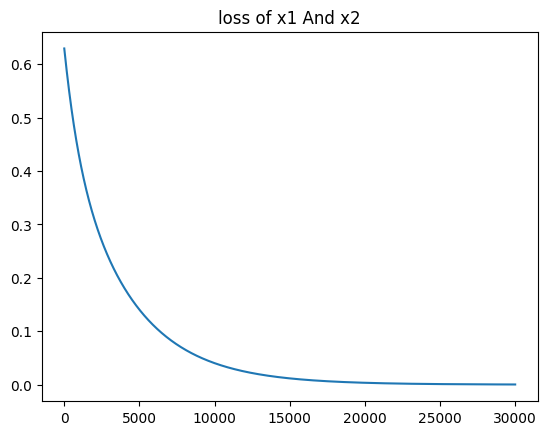

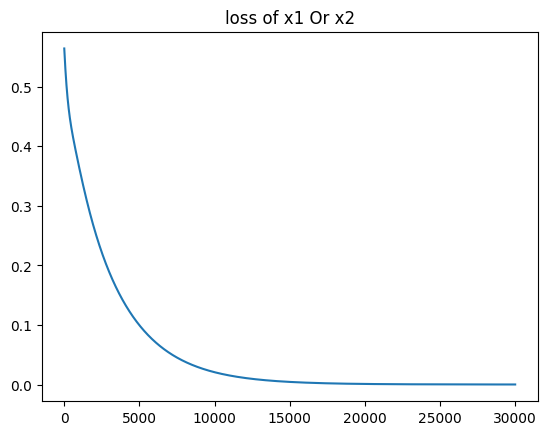

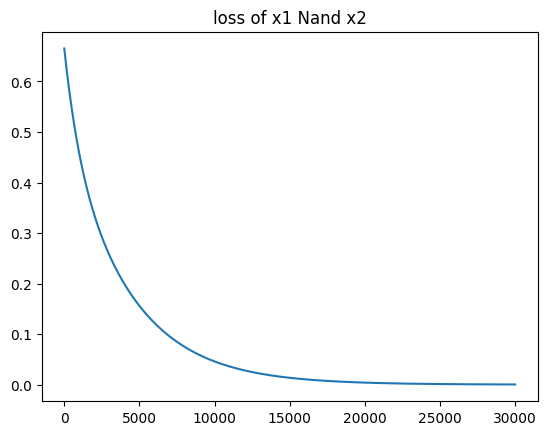

In [ ]:
losses = [result_and, result_or, result_nand]
names = ["And", "Or", "Nand"]
for i in range(len(losses)):
  fig, ax = plt.subplots()
  ax.plot(range(1, iter + 1), losses[i])
  ax.set_title(f"loss of x1 {names[i]} x2")


In [ ]:
node1_layer1 = model_nand.forward(X_test)
node2_layer1 = model_or.forward(X_test)
output = model_and.forward(torch.hstack([node1_layer1, node2_layer1]))

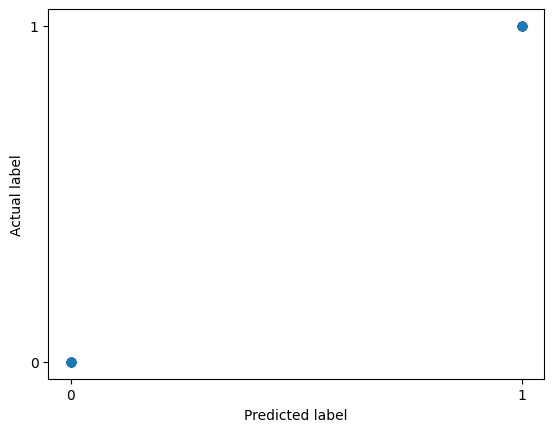

In [ ]:
y_pred = output.detach().numpy()
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test)
ax.set_xlabel("Predicted label")
ax.set_ylabel("Actual label")
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])


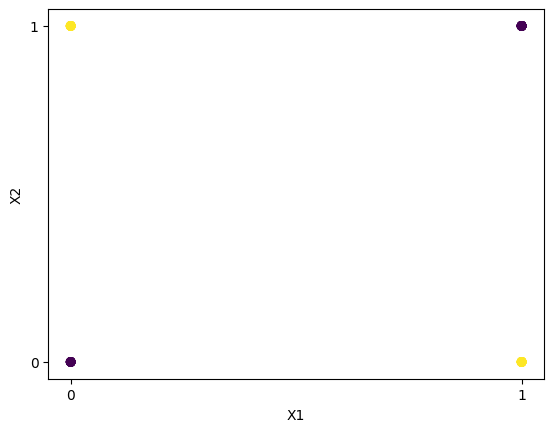

In [ ]:
y_pred = output.detach().numpy()
fig, ax = plt.subplots()
df = pd.DataFrame(X_test, columns = ["x1", "x2"])
df["Predicted label"] = y_pred
df["Actual label"] = y_test

ax.scatter(df["x1"], df["x2"], c = df["Predicted label"])
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])

In [ ]:
df = pd.DataFrame()
df["x1"] = x1
df["x2"] = x2

# prediction
x1 = x1.astype(np.float32)
x2 = x2.astype(np.float32)
x1_torch = torch.from_numpy(x1).clone().view(-1, 1)
x2_torch = torch.from_numpy(x2).clone().view(-1, 1)
X = torch.hstack([x1_torch, x2_torch])
node1_layer1 = model_nand.forward(X)
node2_layer1 = model_or.forward(X)
output = model_and.forward(torch.hstack([node1_layer1, node2_layer1]))
y_hat = output.detach().numpy().round()

df["y_actual"] = y
df["y_predicted"] = y_hat
df

,x1,x2,y_actual,y_predicted
0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,1.0
2,1.0,0.0,1.0,1.0
3,1.0,1.0,0.0,0.0


# Bài 2:
Cho dataset MNIST
* Implement thuật toán neural network với dữ liệu trên sử dụng Pytorch







In [ ]:
mnist_train = pd.read_csv("/content/sample_data/mnist_train_small.csv", header = None)
mnist_test = pd.read_csv("/content/sample_data/mnist_test.csv", header = None)
full = pd.concat([mnist_train, mnist_test])

cut_off = int(len(full) * 0.8)
mnist_train = full[:cut_off]
mnist_test = full[cut_off:]

In [ ]:
mnist_train.shape

(24000, 785)

In [ ]:
from torch.utils.data import random_split, DataLoader

In [ ]:
mnist_train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
mnist_test.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
4000,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4001,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4002,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4003,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4004,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def display_image(image):
  image = np.asanyarray(image)
  image = image.reshape(28,28)
  plt.imshow(image, cmap='Greys')
  plt.axis("off")
  plt.show()

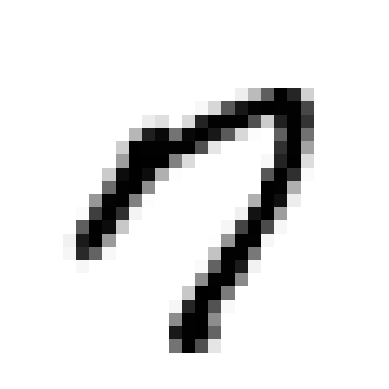

In [ ]:
display_image(mnist_train.iloc[2, 1:])

In [ ]:
X_train = mnist_train.drop(0, axis = 1)
y_train = mnist_train[0]
X_test = mnist_test.drop(0, axis = 1)
y_test = mnist_test[0]

X_train = torch.tensor(X_train.astype(np.float32).values).view(-1, 784)
y_train = torch.tensor(y_train.astype(np.long).values)
X_test = torch.tensor(X_test.astype(np.float32).values).view(-1, 784)
y_test = torch.tensor(y_test.astype(np.long).values)

<ipython-input-18-c6b330350970>:7: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `np.compat.long` is itself an alias. Doing this will not modify any behaviour and is safe. When replacing `np.long`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_train = torch.tensor(y_train.astype(np.long).values)
<ipython-input-18-c6b330350970>:9: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` fo

In [ ]:
class NeuralNetworkClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NeuralNetworkClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.activation = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)
    def forward(self, x):
        out = self.fc1(x)
        out = self.activation(out)
        out = self.fc2(out)
        out = F.log_softmax(out, dim=1)
        return out

def train(model, X_train, y_train, loss_fnc, optimizer, iter = 500):
  losses = []
  for epoch in range(1, iter + 1):
    y_pred = model(X_train)
    loss = loss_fnc(y_pred, y_train)
    losses.append(loss.item())
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if (epoch+1)%100 == 0:
      print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch, iter, loss.item()))

  print(f'Finished epoch {epoch}, latest loss {loss}')
  return (y_pred, losses)

In [ ]:
lr = 0.8
iter = 500
model = NeuralNetworkClassifier(28*28, 40, 10)
loss_fnc = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = lr)
trained = train(model, X_train, y_train, loss_fnc, optimizer, 500)

Epoch [99/500], Loss: 2.3003
Epoch [199/500], Loss: 2.3003
Epoch [299/500], Loss: 2.3003
Epoch [399/500], Loss: 2.3003
Epoch [499/500], Loss: 2.3003
Finished epoch 500, latest loss 2.3003132343292236


* Chỉnh learning rate, vẽ đồ thị loss tương ứng.



Text(0.5, 1.0, 'loss of NeuralNetworkClassifier learning rate 0.8')

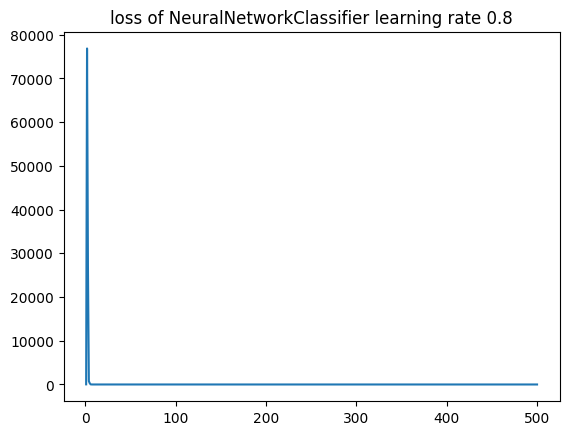

In [ ]:
fig, ax = plt.subplots()
iter = 500
ax.plot(range(1, iter + 1), trained[1])
ax.set_title(f"loss of NeuralNetworkClassifier learning rate {lr}")

In [ ]:
lr = 0.00001
iter = 500
model = NeuralNetworkClassifier(28*28, 40, 10)
loss_fnc = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = lr)
trained = train(model, X_train, y_train, loss_fnc, optimizer, 500)

Epoch [99/500], Loss: 14.7580
Epoch [199/500], Loss: 8.4876
Epoch [299/500], Loss: 5.5986
Epoch [399/500], Loss: 4.1033
Epoch [499/500], Loss: 3.2216
Finished epoch 500, latest loss 3.2146341800689697


Text(0.5, 1.0, 'loss of NeuralNetworkClassifier learning rate 1e-05')

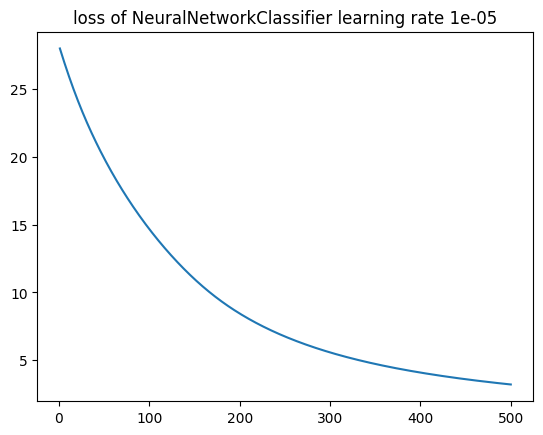

In [ ]:
fig, ax = plt.subplots()
iter = 500
ax.plot(range(1, iter + 1), trained[1])
ax.set_title(f"loss of NeuralNetworkClassifier learning rate {lr}")

Epoch [99/500], Loss: 0.5123
Epoch [199/500], Loss: 0.3135
Epoch [299/500], Loss: 0.2247
Epoch [399/500], Loss: 0.1735
Epoch [499/500], Loss: 0.1404
Finished epoch 500, latest loss 0.14006942510604858


Text(0.5, 1.0, 'loss of NeuralNetworkClassifier learning rate 0.001')

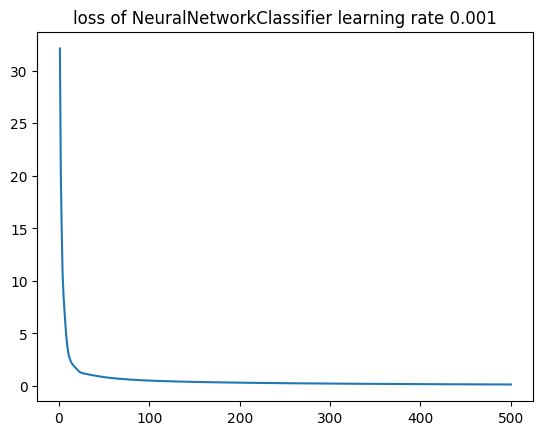

In [ ]:
lr = 0.001
iter = 500
model2 = NeuralNetworkClassifier(28*28, 40, 10)
loss_fnc2 = nn.CrossEntropyLoss()
optimizer2 = torch.optim.Adam(model2.parameters(), lr = lr)
trained = train(model2, X_train, y_train, loss_fnc2, optimizer2, 500)

fig, ax = plt.subplots()
ax.plot(range(1, iter + 1), trained[1])
ax.set_title(f"loss of NeuralNetworkClassifier learning rate {lr}")

* Chia tập train/test tỉ lệ 80/20, tính các chỉ số MSE, RSME, MAE, MAPE trên tập test.

In [ ]:
output = model2(X_test)
_, predicted = torch.max(output, 1)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, classification_report


def evaluate_model(y_true, y_predict):
  df = pd.DataFrame()
  df["MSE"] = [mean_squared_error(y_true, y_predict, squared = True)]
  df["RMSE"] = [mean_squared_error(y_true, y_predict, squared = False)]
  df["MAE"] = [mean_absolute_error(y_true, y_predict)]
  df["MAPE"] = [mean_absolute_percentage_error(y_true, y_predict)]
  return df

evaluate_model(y_test, predicted)

,MSE,RMSE,MAE,MAPE
0,1.0325,1.01612,0.217833,7.806239e+13


In [ ]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       610
           1       0.99      0.98      0.99       685
           2       0.94      0.94      0.94       614
           3       0.93      0.92      0.93       602
           4       0.94      0.92      0.93       564
           5       0.91      0.92      0.91       520
           6       0.95      0.97      0.96       580
           7       0.96      0.96      0.96       617
           8       0.88      0.92      0.90       590
           9       0.94      0.92      0.93       618

    accuracy                           0.94      6000
   macro avg       0.94      0.94      0.94      6000
weighted avg       0.94      0.94      0.94      6000

